In [26]:
import h5py
import pandas as pd  # Useful for manipulating the data
import matplotlib.pyplot as plt  # For potential visualizations 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [27]:
size_of_event = 500
#max 500 points per shower
file_path = '/beegfs/desy/user/korcariw/multiRes_CaloClouds/dataset/showers/photons_10_100GeV_10bins_showers_train.h5'
#max 1700 points per shower
#file_path = '/beegfs/desy/user/korcariw/CaloClouds/dataset/showers/photons_10_100GeV_float32_sorted_train.h5'
with h5py.File(file_path, 'r') as f:
    dataset_names = list(f.keys())
    print(dataset_names) #get the names of the datasets

['genE', 'nhits', 'showers']


In [28]:
with h5py.File(file_path, 'r') as f:
    dataset_showers = f['showers']  # Access the dataset like a dictionary
    print(dataset_showers)
    data_showers = dataset_showers[:]
#get info about the shape of the showers

<HDF5 dataset "showers": shape (760000, 500, 4), type "<f4">


In [29]:
with h5py.File(file_path, 'r') as f:
    dataset_genE = f['genE']  # Access the dataset like a dictionary
    print(dataset_genE)
    data_genE = dataset_genE[:]
#get info about the shape of the energies

<HDF5 dataset "genE": shape (760000, 1), type "<f4">


In [30]:
energy_total = data_genE[:] #get the total energy per shower
#create a filter for the desired energy 
filter_energy = 60
threshold_energy = 50

is_in_range = np.abs(energy_total - filter_energy) <= threshold_energy
selected_indices = np.where(is_in_range)[0]
filtered_data = data_showers[selected_indices]



x_complete, y_complete, z_complete, energy_xyz_complete = [filtered_data[:, :, i] for i in range(4)]


#extract the xyz coordinates
x = x_complete[x_complete != 0]
y = y_complete[y_complete != 0]
z = z_complete[z_complete != 0]


#extract the energies
energy_xyz = energy_xyz_complete[energy_xyz_complete > 0]

#transform into MeV
energy_xyz_mev = energy_xyz*1000
energy_total_mev = energy_total*1000



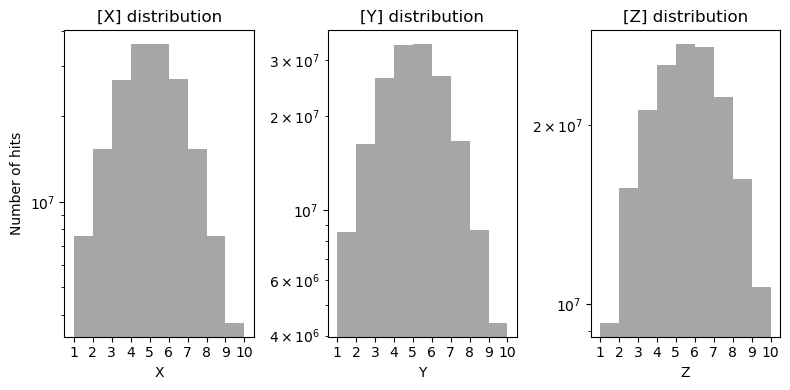

In [31]:
#now the the plots / histograms for x,y,z distribution respectively
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
bin_edges = np.arange(1, 11)

plt.subplot(1, 3, 1) 
plt.title('[X] distribution')
plt.hist(x, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Number of hits')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.title('[Y] distribution')
plt.hist(y, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('Y')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yscale('log')


plt.subplot(1, 3, 3)
plt.title('[Z] distribution')
plt.hist(z, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('Z')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yscale('log')

plt.tight_layout()
plt.show()

169184.12
12.038743


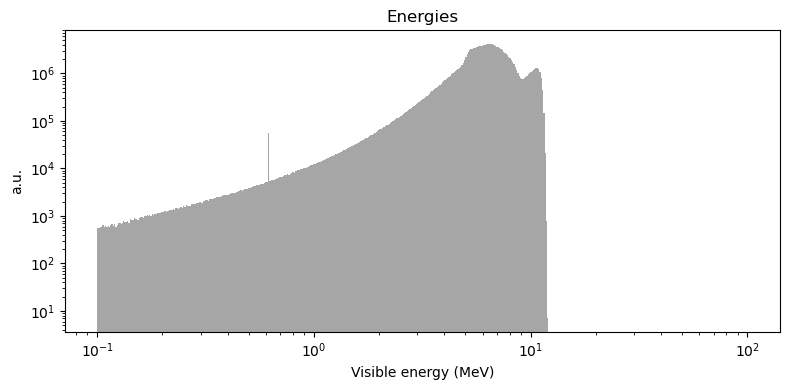

In [32]:
plt.figure(figsize=(8, 4)) # Adjust figure size as needed

print(max(energy_xyz_mev))
print(np.log(max(energy_xyz_mev)))
#transforming the data for a log_scale
log_energy = np.log(energy_xyz_mev)
min_value = 0.1
max_value = 100
num_bins = 500
bins = np.logspace(np.log(min_value), np.log(max_value), num_bins + 1, base =np.e)  


plt.title('Energies')
plt.hist(log_energy, bins=bins, alpha=0.7,color='grey')
plt.xlabel('Visible energy (MeV)')
plt.ylabel('a.u.')


plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xscale('log')
plt.yscale('log')


plt.tight_layout()
plt.show()

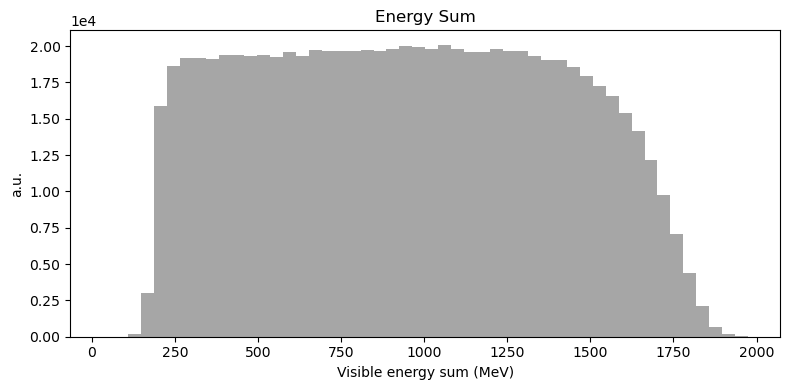

In [33]:
plt.figure(figsize=(8, 4)) # Adjust figure size as needed


your_array = np.array([...])  # Your array with 2 million entries

# Reshape into groups of 500
new_energy_xyz = energy_xyz_complete.reshape(-1, size_of_event)


plt.title('Energy Sum')
plt.hist(new_energy_xyz.sum(-1), bins=50, alpha=0.7,color='grey',histtype='stepfilled')
plt.xlabel('Visible energy sum (MeV)')
plt.ylabel('a.u.')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))



plt.tight_layout()
plt.show()

[ 29  64  67 ... 369 375 408]


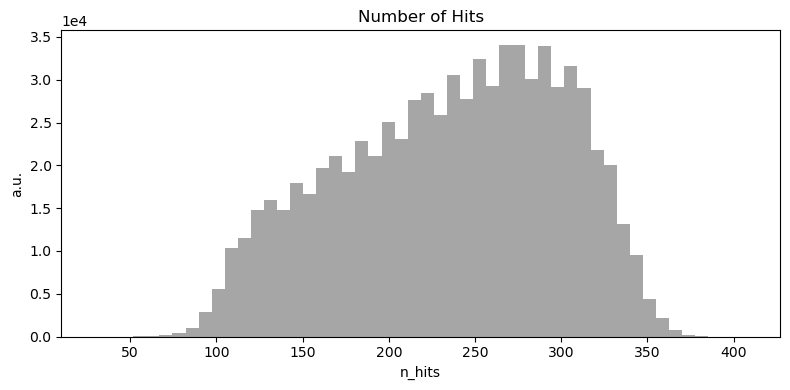

In [34]:
plt.figure(figsize=(8, 4)) # Adjust figure size as needed


your_array = np.array([...])  # Your array with 2 million entries

n_hits = new_energy_xyz !=0

counts_per_500 = n_hits.reshape(-1, size_of_event).sum(axis=1)
print(counts_per_500)

plt.title('Number of Hits')
plt.hist(counts_per_500, bins=50, alpha=0.7,color='grey',histtype='stepfilled')
plt.xlabel('n_hits')
plt.ylabel('a.u.')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))



plt.tight_layout()
plt.show()

/tmp/ipykernel_126663/914922205.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(sm, label='Energy in GeV')


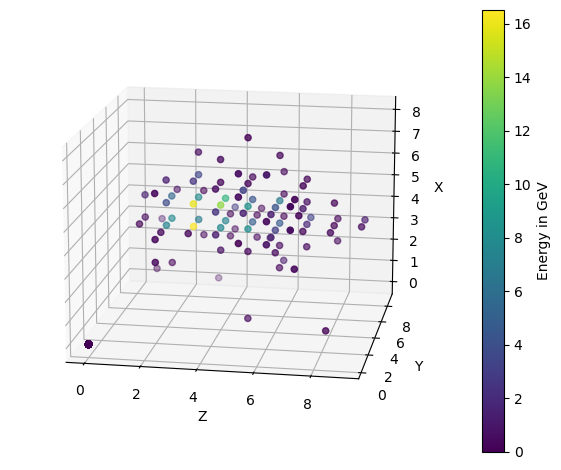

In [35]:
def threedplot(shower):
    x, y, z, e = [shower[ :, i] for i in range(4)]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(z, y, x, c=e, cmap='viridis') 
    ax.set_xlabel('Z')
    ax.set_ylabel('Y')
    ax.set_zlabel('X')
    ax.view_init(elev=15, azim=-80)
    
    # Add a colorbar
    norm = plt.Normalize(e.min(), e.max())  
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm) 
    sm.set_array([]) 
    fig.colorbar(sm, label='Energy in GeV') 

    
    fig.tight_layout()
    fig.savefig('./plots/threedplot.pdf')
    
threedplot(filtered_data[2900])